Import modules

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Make request to get raw html file. 

404-error can't be accessed.

200 code - can be accessed.

!clear - to clear the terminal page in CMD

In [19]:
webpage = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')
print(webpage.status_code)
print(webpage.headers)

200
{'Date': 'Fri, 12 Feb 2021 08:12:44 GMT', 'Content-Type': 'text/html', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=dd5596b3deacb0a2c4218161b55b9f7621613117563; expires=Sun, 14-Mar-21 08:12:43 GMT; path=/; domain=.codecademy.com; HttpOnly; SameSite=Lax', 'x-amz-id-2': 'TmE/u6UFXS9XFoOzuLul7NmG2sUtfOZ0vhTfqIEugLtmMFeePqDn0hjStMglU/adZy5M2rWxEfk=', 'x-amz-request-id': '9D20F9B2E437E36F', 'Last-Modified': 'Tue, 17 Nov 2020 15:48:50 GMT', 'x-amz-version-id': 'null', 'CF-Cache-Status': 'DYNAMIC', 'cf-request-id': '0836e5bba50000d437cc173000000001', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Server': 'cloudflare', 'CF-RAY': '6204d8a5d949d437-BUD', 'Content-Encoding': 'gzip'}


BeautifulSoup object, using html.parser, we'll get a nicely formatted html file with ".prettify"

In [20]:
soup = BeautifulSoup(webpage.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <style>
   #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
  </style>
  <script async="" src="/cdn-cgi/bm/cv/669835187/api.js">
  </script>
 </head>
 <body>
  <!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
  <div id="banner">
   <h1>
    Cacao Ratings
   </h1>
  </div>
  <div id="infoContainer">
   <table class="infoTable">
    <tr>
     <td>
      Compiled ratings of over 1700 Chocolate bars
     </td>
    </tr>
    <tr>
     <td>
      Ratings are from 1-5
     </td>
    </tr>
   </table>
 

Rating, Company Name, Cocoa Percent

In [21]:
# find all atributes from the class Rating
list_ratings = soup.find_all(attrs={'class':'Rating'})

print(list_ratings[0:10])
# read trough the list of attributes, and find the values
# record the values in the list "ratings"
tag = soup.find_all('td')[:20]
# print(tag)
# print(soup.attrs()) # not working, tag seems to be a list

ratings=[]
i=0
for rate in list_ratings:
  if i != 0:
    value = round(float(rate.get_text()),2)
    # print(value)
    ratings.append(value)
  i += 1
# print(ratings)

# find all atributes from the class Company
list_company = soup.find_all(attrs={'class':'Company'})

companies=[]
for company in list_company[1:]:
  name = company.get_text()
  companies.append(name)
# print(companies)

# Create a list that contains all of the cocoa percentages. 
# Store each percent as an integer, after stripping off the % character.
# select(".CocoaPercent") == find_all(attrs={'class':"CocoaPercent"})
cocoa_percent_tags = soup.select(".CocoaPercent")
# print(cocoa_percent_tags)
cocoa_percents = []
for tag in cocoa_percent_tags[1:]:
  percent = int(round(float(tag.get_text().strip('%')),0))
  cocoa_percents.append(percent)

[<td class="Rating">Rating</td>, <td class="Rating">3.75</td>, <td class="Rating">2.75</td>, <td class="Rating">3</td>, <td class="Rating">3.5</td>, <td class="Rating">3.5</td>, <td class="Rating">2.75</td>, <td class="Rating">3.5</td>, <td class="Rating">3.5</td>, <td class="Rating">3.75</td>]


Create histogram with Matplotlib

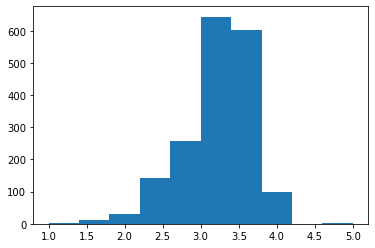

In [5]:
plt.hist(ratings)
plt.show()

Create DataFrame (in Pandas) with 3 columns: Company Name, Ratings, CocoaPercentage

In [6]:
data = {"Company Name": companies, "Ratings": ratings}
data["CocoaPercentage"] = cocoa_percents
company_rating_df = pd.DataFrame.from_dict(data)
#print(data)

Use ".groupby" to group your DataFrame by Company and take the average of the grouped ratings.

In [7]:
mean_values1 = company_rating_df.groupby("Company Name").Ratings.mean()
mean_values2 = company_rating_df.groupby("Company Name").CocoaPercentage.mean()

Use the ".nlargest" command to get the 10 highest rated chocolate companies. Print them out.

In [8]:
ten_best_1 = mean_values1.nlargest(10)
ten_best_2 = mean_values2.nlargest(10)
print(round(ten_best_1,3))
print(round(ten_best_2,2))

Company Name
Tobago Estate (Pralus)                  4.000
Heirloom Cacao Preservation (Zokoko)    3.875
Ocelot                                  3.875
Amedei                                  3.846
Matale                                  3.812
Patric                                  3.792
Idilio (Felchlin)                       3.775
Acalli                                  3.750
Chocola'te                              3.750
Christopher Morel (Felchlin)            3.750
Name: Ratings, dtype: float64
Company Name
Bouga Cacao (Tulicorp)            88.50
Chocolate Alchemist-Philly        85.00
Garden Island                     85.00
Lindt & Sprungli                  85.00
Nanea                             85.00
Vintage Plantations (Tulicorp)    82.50
Claudio Corallo                   82.25
Durand                            82.00
Peppalo                           82.00
Marsatta                          81.50
Name: CocoaPercentage, dtype: float64


Make a scatterplot of ratings (your_df.Rating) vs percentage of cocoa (your_df.CocoaPercentage)

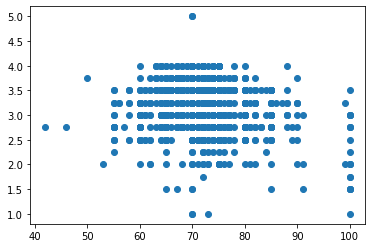

In [9]:
plt.scatter(company_rating_df.CocoaPercentage, company_rating_df.Ratings)
plt.show()

Use numpy commands to draw a line of best-fit over the scatterplot.
Insert this code after you create the scatterplot, but before you call ".show()"

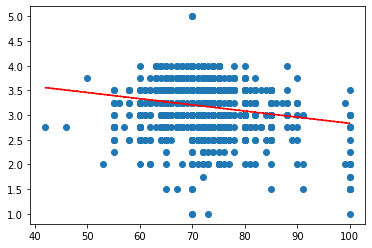

In [10]:
plt.scatter(company_rating_df.CocoaPercentage, company_rating_df.Ratings)

z = np.polyfit(company_rating_df.CocoaPercentage, company_rating_df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(company_rating_df.CocoaPercentage, line_function(company_rating_df.CocoaPercentage), "r--")

plt.show()